# Dishonest Internet User Exploratory Analysis
**Author:** Kalea Sebesta<br>
**Date:** 16 October 2018<br>

**Acknowledgements:** 1. G. DíAngelo, S. Rampone, F. Palmieri, ìDeveloping a Trust Model for Pervasive Computing Based on Apriori Association Rules Learning and Bayesian Classificationî, SOCO ñ Soft Computing Journal, Vol.21, n.21, pp. 6297-6315, 2017.  DOI: 10.1007/s00500-016-2183-1 2. G. D'Angelo, S. Rampone and F. Palmieri, "An Artificial Intelligence-Based Trust Model for Pervasive Computing," 2015 10th International Conference on P2P, Parallel, Grid, Cloud and Internet Computing (3PGCIC), Krakow, 2015, pp. 701-706. DOI: 10.1109/3PGCIC.2015.94<br>

**Purpose:** The purpose of this notebook is to explore the dataset from UC Irvine Repository about dishonest internet users. This will primarily included descriptive statistics on the various text files within the repository.

**Dataset:** UC Irvine https://archive.ics.uci.edu/ml/datasets/Dishonest+Internet+users+Dataset#<br>
- CT - Counting Trust. It is used to count how many trustworthy transactions (belonging to a specific context) occur after the last untrustworthy transaction.
- CU - Counting Un-trust. It is used to count how many untrustworthy transactions (belonging to a specific context) occur after the last trustworthy transaction.
- LT - Last Time. It is used to take into account of the date at which the last experience in a specific context took place.
- TC - Transactions Context. It is used to identify the type of transaction, such as game, e-commerce, social network and others.
- TS - Trust Score. It  is the score that an entity gives to another entity at the end of each direct interaction.

Files to explore:
- Dishonest Internet users dataset.txt
- BM_10%.txt
- BM_20%.txt
- BM_30%.txt
- BM_40%.txt
- BM_50%.txt
- BS_10%.txt
- BS_20%.txt
- BS_30%.txt
- BS_40%.txt
- BS_50%.txt
- RO_10%.txt
- RO_20%.txt
- RO_30%.txt
- RO_40%.txt
- RO_50%.txt
- Dishonest Internet users dataset.txt

According to the dataset description for the UC Irvine documentation: 

"In pervasive computing the interacting users are not able to obtain information about the trustworthiness of each other. Thus, unfair users can act maliciously towards others. The proposed solution enables to evaluate the trustworthiness of each user by monitoring the behavior of each other during their interaction on the network. Because, there could be situation in which users have not historical data (tuples) for interacting with another one, it may get data (tuples) from third-parties who previously have had interaction with the inquired user.
Nevertheless, the trustworthiness of such third party entities (recommenders) needs to be evaluated also. Indeed, they may act through attacks, such as: **Ballot Stuffing (BS)**, **Bad mouthing (BM)** , and **Random opinion (RO)**.
Changing of the TS parameter for a number of rows in the dataset, and in according to a specific attack, allows to obtain different datasets useful for the recommenders trustworthiness evaluation.
According to this, the following datasets are also provided:
- BM_x%.txt  x is the percentage of unfair recommendations obtained by a BM attack. It ranges from 10 to 50.
- BS_x%.txt  x is the percentage of unfair recommendations obtained by a BS attack. It ranges from 10 to 50.
- RO_x%.txt  x is the percentage of unfair recommendations obtained by a BM attack. It ranges from 10 to 50."

Attribute Information:
- 1) CT {CT_range_1, CT_range_2, CT_range_3, CT_range_4}
- 2) CU {CU_range_1, CU_range_2, CU_range_3, CU_range_4}
- 3) LT {LT_range_1, LT_range_2, LT_range_3, LT_range_4}
- 4) TC {sport, game, ECommerce, holiday}
- 5) TS {trustworthy, untrustworthy}

The numerical attributes (CT, CU, LT) was discretized. The data decription contains links to papers that explain how and why they wer discretized.


## Import Packages & Read In Files
All of the files were read into dataframes and then the length of these dataframes were checked. All of the dataframes have the same length (322). Essentially, all of the files were just different breakdowns for the type of attack of the same data. The column contents for each file were also investigated and it was seen an additional column was added which contained all null values and thus was dropped from each of the dataframes. Also, since the data was a textfile that didn't have headers, headers were created and added to the dataframes. From there, I created a new column TA which stands for type of attack and corresponds to whether the file was BS, BM, RO, or unknown.

In [315]:
#import packages
import os
import pandas as pd
import pandas_profiling as pp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
#read in datasets
path = '/Users/kaleasebesta/Documents/Machine Learning Datasets:Projects/Bayesian Network/UC Irvine Dishonest Internet DataSet'
df = pd.read_csv(path + '/Dishonest Internet users dataset.txt', header = None, sep = ' ')
BM_10 = pd.read_csv(path +'/BM_10%.txt', header = None, sep = ' ')
BM_20 = pd.read_csv(path + '/BM_20%.txt', header = None, sep = ' ')
BM_30 = pd.read_csv(path + '/BM_30%.txt', header = None, sep = ' ')
BM_40 = pd.read_csv(path + '/BM_40%.txt', header = None, sep = ' ')
BM_50 = pd.read_csv(path + '/BM_50%.txt', header = None, sep = ' ')
BS_10 = pd.read_csv(path + '/BS_10%.txt', header = None, sep = ' ')
BS_20 = pd.read_csv(path + '/BS_20%.txt', header = None, sep = ' ')
BS_30 = pd.read_csv(path + '/BS_30%.txt', header = None, sep = ' ')
BS_40 = pd.read_csv(path + '/BS_40%.txt', header = None, sep = ' ')
BS_50 = pd.read_csv(path + '/BS_50%.txt', header = None, sep = ' ')
RO_10 = pd.read_csv(path + '/RO_10%.txt', header = None, sep = ' ')
RO_20 = pd.read_csv(path + '/RO_20%.txt', header = None, sep = ' ')
RO_30 = pd.read_csv(path + '/RO_30%.txt', header = None, sep = ' ')
RO_40 = pd.read_csv(path + '/RO_40%.txt', header = None, sep = ' ')
RO_50 = pd.read_csv(path + '/RO_50%.txt', header = None, sep = ' ')

### Determine Length of Dataframes

In [317]:
arr = os.listdir(path)
arr.remove('DataSetDescription.txt') 
arr.remove('Dishonest Internet users dataset.txt' )

dataframes = [BM_10, BM_20, BM_30, BM_40, BM_50,
              BS_10, BS_20, BS_30, BS_40, BS_50,
              RO_10, RO_20, RO_30, RO_40, RO_50]
new_arr = []
for file in arr:
    new_arr.append(file[:5])
new_arr.sort()
ind = 0
for i in new_arr:
    print("Length of {}: {}".format(i, len(dataframes[ind])))
    ind += ind
print('Length of Dishonest Dataset: {}'.format(len(df)))

Length of BM_10: 322
Length of BM_20: 322
Length of BM_30: 322
Length of BM_40: 322
Length of BM_50: 322
Length of BS_10: 322
Length of BS_20: 322
Length of BS_30: 322
Length of BS_40: 322
Length of BS_50: 322
Length of RO_10: 322
Length of RO_20: 322
Length of RO_30: 322
Length of RO_40: 322
Length of RO_50: 322
Length of Dishonest Dataset: 322


### Check the Column Headings of Dataframes

In [318]:
#check the format of the dataframes
df.head(1)

,0,1,2,3,4
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy


In [319]:
bm10.head(1)

,0,1,2,3,4,5,6
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,NaN


In [320]:
bs10.head(1)

,0,1,2,3,4,5,6
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,NaN


In [321]:
ro10.head(1)

,0,1,2,3,4,5,6
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,NaN


### Create Functions 
The first function was created to rename the headers from integers to meaningful column names. The second function takes in a dataframe and the type of attack and creates a new column with the appropreate type of attack designated. This will help in identifying the type of attack once the dataframes are merged together.

In [322]:
#give column names
def give_column_names(df):
    df = df.rename(index=str, columns={0: "CT", 1: "CU", 2: "LT", 3: "TC", 4:"TS", 5: "User_Status"})
    return df

#add column type of attack to the dataframes to help get information when all dataframes are merged together
def add_column(df, ta):
    if ta == 'BM':
        df['TA'] = 'BM'
    elif ta == 'BS':
        df['TA'] = 'BS'
    elif ta == 'RO':
        df['TA'] = 'RO'
    else:
        df['TA'] = 'Unknown'
    return df

### Apply Functions and Merge Dataframes

In [323]:
for df in [BM_10, BM_20, BM_30, BM_40, BM_50]:
    df = add_column(df, 'BM')
for df in [BS_10, BS_20, BS_30, BS_40, BS_50]:
    df = add_column(df, 'BS')
for df in [RO_10, RO_20, RO_30, RO_40, RO_50]:
    df = add_column(df, 'RO')
df = add_column(df, 'Unknown')

In [324]:
frames = []
for dfs in dataframes:
    n = give_column_names(dfs)
    frames.append(n)

result = pd.concat(frames, sort = False)

### Additional Cleaning
Column 6 had only null values and thus was dropped from the dataframe

In [325]:
#check the 6th column if all nan drop it
print(result[6].unique().item())
result = result.drop([6], axis = 1)

nan


In [326]:
result.head()

,CT,CU,LT,TC,TS,User_Status,TA
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,BM
1,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,BM
2,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy,fair,BM
3,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy,fair,BM
4,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy,fair,BM


## Explore Frequency Plots

In [327]:
result.describe()

,CT,CU,LT,TC,TS,User_Status,TA
count,4830,4830,4830,4830,4830,4830,4830
unique,4,4,4,4,2,2,4
top,CT_range_1,CU_range_1,LT_range_1,holiday,trustworthy,fair,BS
freq,2145,3900,2010,1890,3178,4055,1610


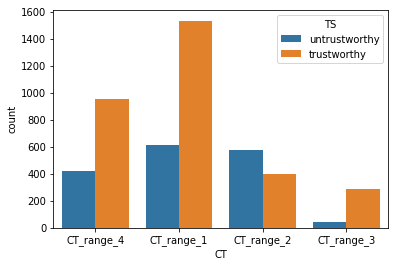

In [299]:
sns.countplot(x="CT",hue="TS", data=result)

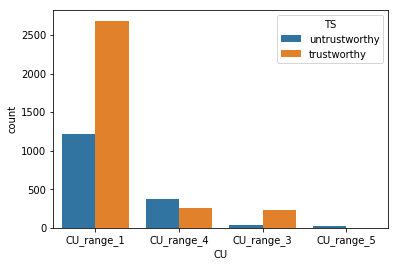

In [300]:
sns.countplot(x="CU",hue="TS", data=result)

In [144]:
#CU_range_5 needs to be changed to CU_range_2
df = df.replace({'CU': {"CU_range_5": "CU_range_2"}})

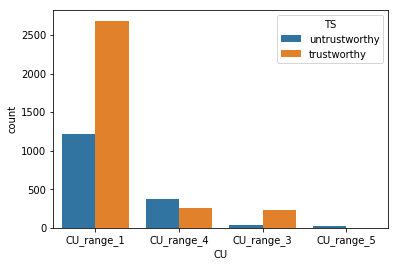

In [301]:
sns.countplot(x="CU",hue="TS", data=result)

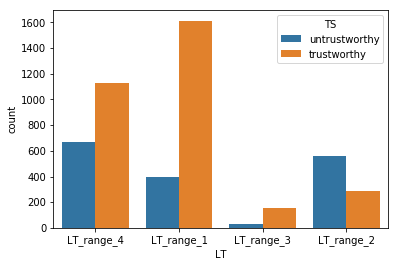

In [302]:
sns.countplot(x="LT",hue="TS", data=result)

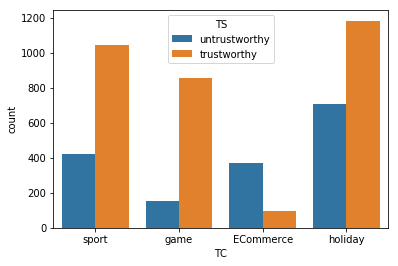

In [303]:
sns.countplot(x="TC",hue="TS", data=result)

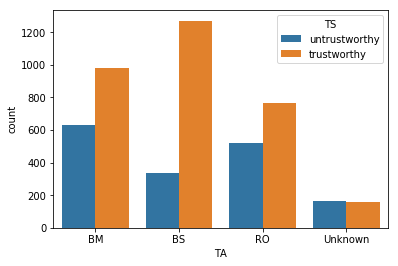

In [312]:
sns.countplot(x="TA",hue="TS", data=result)

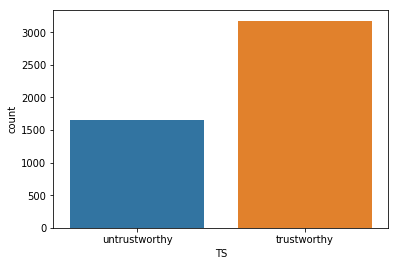

In [304]:
sns.countplot(x="TS", data=result)

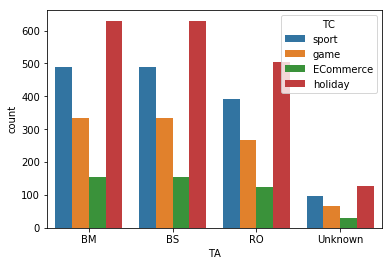

In [313]:
sns.countplot(x="TA",hue="TC", data=result)

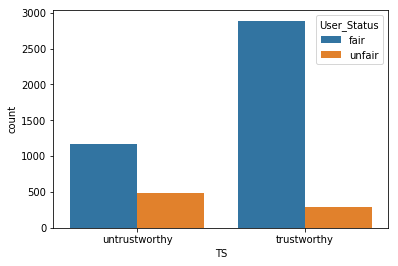

In [305]:
sns.countplot(x="TS",hue="User_Status", data=result)

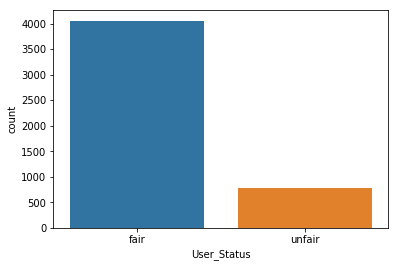

In [306]:
sns.countplot(x="User_Status", data=result)

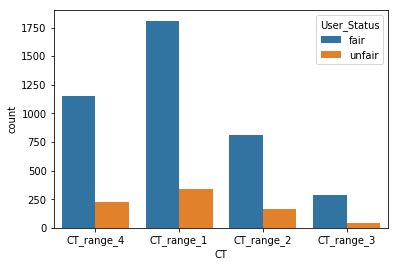

In [307]:
sns.countplot(x="CT",hue="User_Status", data=result)

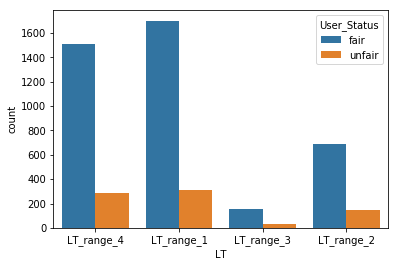

In [308]:
sns.countplot(x="LT",hue="User_Status", data=result)

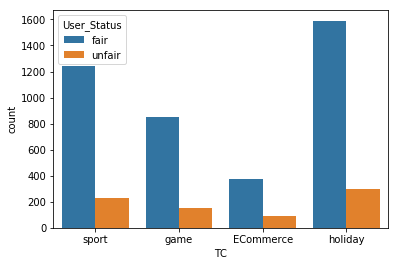

In [309]:
sns.countplot(x="TC",hue="User_Status", data=result)

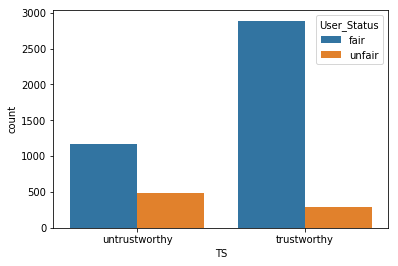

In [310]:
sns.countplot(x="TS",hue="User_Status", data=result)

## Save File 
The cleaned and merged dataframe was saved to a csv to allow for future analysis to be conducted. 

In [328]:
#save dataframe
result.to_csv('Dishonest_Internet_User_Expanded.csv', index = False)